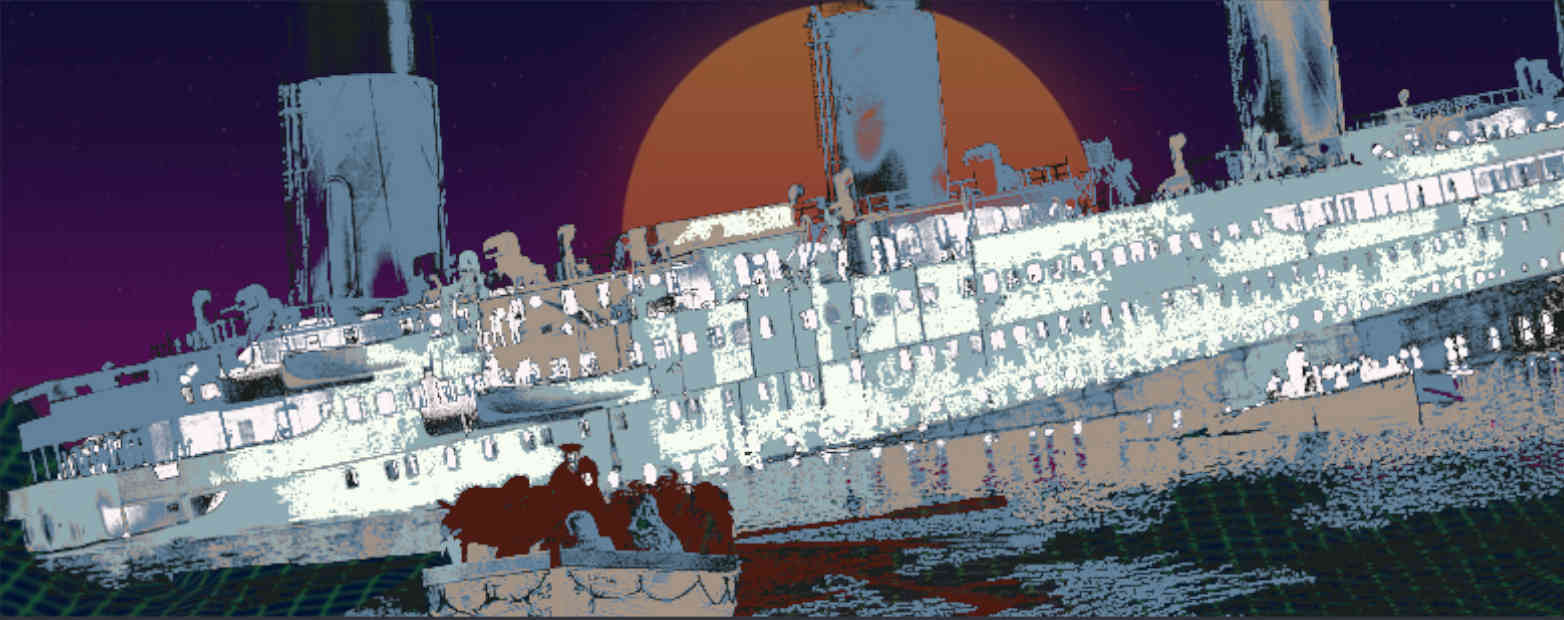

# Introduction
The sinking of the RMS Titanic in 1912 remains one of the most tragic and studied maritime disasters in history. With over 1,500 lives lost, the event has inspired extensive analysis of the factors that influenced survival. This study leverages the Titanic dataset to explore patterns in survival, particularly through the lens of the Birkenhead Drill, a maritime protocol that prioritizes the rescue of "women and children first."

*Some initial code. Skip ahead.*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
def getBreakDown(data):
  print("\n  --Info--")
  print(data.info())
  print("\n  --Shape--")
  print(data.shape)
  print("\n --Null Data--")
  print(data.isnull().sum())

def getHeatMap(data, t, x, y, c):
  plt.figure(figsize=(10, 6))
  sns.heatmap(data, annot=True, cmap=c, fmt=".2f")
  plt.title(t)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

# **Titanic Data set.**

*Load data, and Claning it. It all vary boring, so skip ahead.*



In [4]:

df = pd.read_csv("/content/drive/MyDrive/datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival: Survival (0 = No; 1 = Yes)
* name: Name
* sex: Sex
* age: Age
* sibsp: Number of Siblings/Spouses Aboard
* parch: Number of Parents/Children Aboard
* ticket: Ticket Number
* fare: Passenger Fare (British pound)
* cabin: Cabin
* embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

*There were 2200 people on board. 1300 passengers. This is by no mean a complete date set.*

In [5]:
getBreakDown(df)


  --Info--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

  --Shape--
(891, 12)

 --Null Data--
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             

# Data Preprocessing
Before diving into the analysis, the dataset required significant preprocessing to ensure accuracy and usability:

**Dropping Unnecessary Columns**: Certain columns that were not directly relevant to the survival analysis were dropped to streamline the dataset. These columns included `PassengerId`, `Name`, `Ticket`, `Fare`, and `Cabin`. The rationale for dropping these columns was that they either contained unique identifiers or sparse information that wouldn't contribute significantly to predicting survival.

**Handling Missing Values**: The dataset contained missing values, particularly in the Age column. We used forward fill (ffill) to handle these missing entries.

**Encoding Categorical Variables**: Handled at a later point.

**Age Binning**: In our data preprocessing phase, we transformed the continuous Age variable into a categorical variable by grouping ages into predefined ranges, a process known as binning or bucketing. This transformation is particularly useful when the specific age values are less important than the age group to which an individual belongs.

In [6]:
d_df = df.drop(columns = ["PassengerId", "Name", "Ticket", "Fare", "Cabin"])
filled_df = d_df.ffill()
getBreakDown(filled_df)


  --Info--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB
None

  --Shape--
(891, 7)

 --Null Data--
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64


In [7]:
a_bins = np.array([0,16,32,48,64,80])
a_labels = ["0-16","17-32","33-48","49-64","65-80"]
filled_df["Age_Range"] = pd.cut(filled_df["Age"], bins=a_bins, labels=a_labels)
filled_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_Range
0,0,3,male,22.0,1,0,S,17-32
1,1,1,female,38.0,1,0,C,33-48
2,1,3,female,26.0,0,0,S,17-32
3,1,1,female,35.0,1,0,S,33-48
4,0,3,male,35.0,0,0,S,33-48


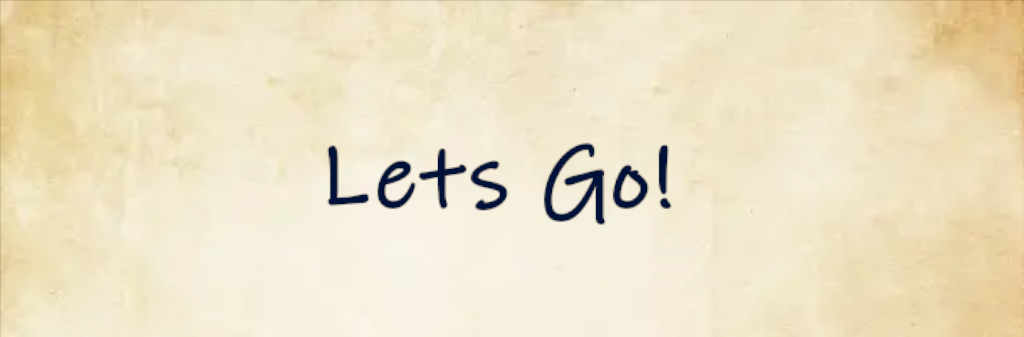

# Time for heatmaps

Visualizations such as heatmaps illustrated these survival trends, showing a clear stratification by sex, class, and age.

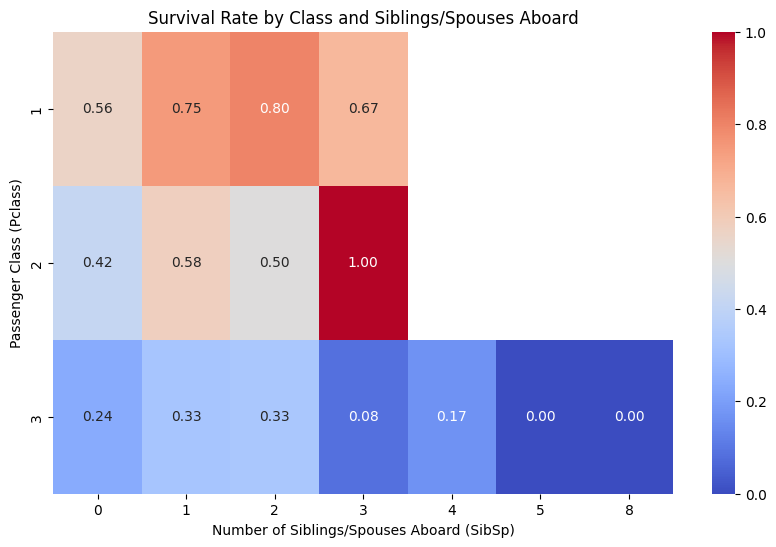

In [8]:
class_sibsp_survival = filled_df.groupby(['Pclass', 'SibSp'])['Survived'].mean().unstack()

getHeatMap(class_sibsp_survival, "Survival Rate by Class and Siblings/Spouses Aboard", "Number of Siblings/Spouses Aboard (SibSp)", "Passenger Class (Pclass)", "coolwarm")

**Note**: There is only one 2nd class passengers with 3 Siblings/Spouses. She was travelling with her husband and two bothers, which didn't survive.

* https://www.encyclopedia-titanica.org/titanic-survivor/lillian-renouf.html

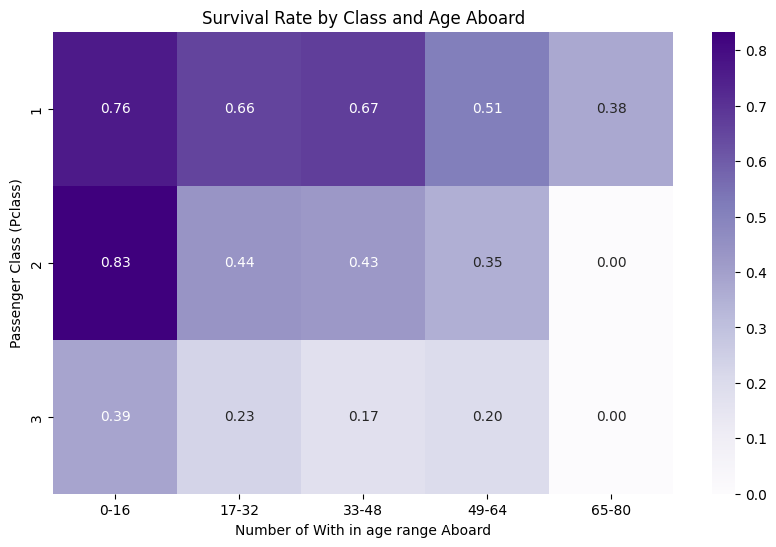

In [9]:
class_age_survival = filled_df.groupby(['Pclass', 'Age_Range'], observed=True)['Survived'].mean().unstack()

getHeatMap(class_age_survival, "Survival Rate by Class and Age Aboard", "Number of With in age range Aboard", "Passenger Class (Pclass)", "Purples")

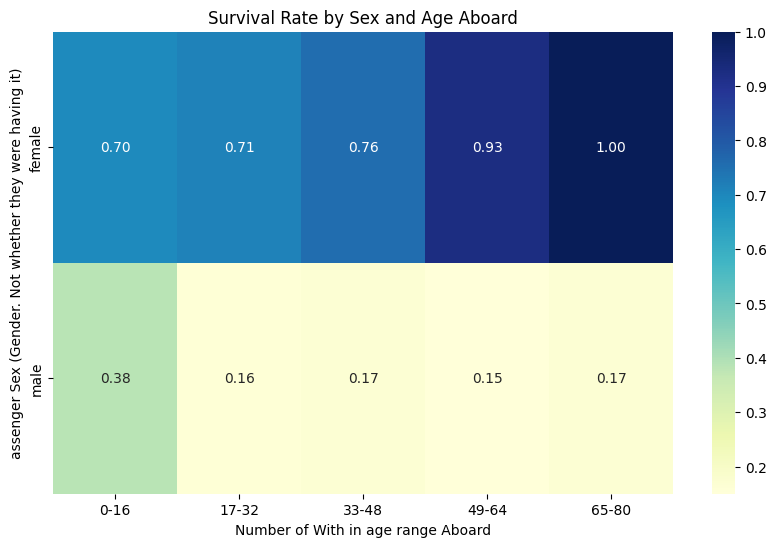

In [10]:
sex_age_survival = filled_df.groupby(['Sex', 'Age_Range'], observed=True)['Survived'].mean().unstack()

getHeatMap(sex_age_survival, "Survival Rate by Sex and Age Aboard", "Number of With in age range Aboard", "assenger Sex (Gender. Not whether they were having it)", "YlGnBu")

**There are three kinds of lies: Lies, Damned Lies, and Statistics**

**Note**:There is no woman aged 65-80 on the titanic in the recorded data set. The age of this woman was left out the data set. `ffill` (forward fill) was use to generate missing ages giving her an age of 65. In reality, she was 40.

* https://www.encyclopedia-titanica.org/titanic-survivor/marion-kenyon.html

# Exploratory Data Analysis (EDA)

**Class/Spouse and Sibling**: First-class passengers had the highest survival rates, followed by second and third class, reflecting the socio-economic disparities of the time. furthermore, with regards to the lower class. The number of siblings adverse effect on survival

**Class/Age**: Younger passengers, particularly those under 16, showed higher survival rates, when part of the first and second class, aligning with the prioritization of women and children.

**Sex/Age**: As expected, females of all ages had a significantly higher survival rate compared to males, consistent with the Birkenhead Drill.

# Machine Learning
AI can tell

# Data Preprocessing

**Split Data Set**: Due to females having significantly higher survival rate, we we split the data.

**Encoding Categorical Variables**: Categorical variables like Age Range and Embarked were converted into numerical form using one-hot encoding. This transformation was crucial for machine learning models, which require numerical inputs.

**Outliers**:There were two outliers. The 65 year old female, has had her age corrected to 40. The female with 3 siblings has had it change to 2 siblings(*3/4 of her tavling party did not servive*).

In [11]:
data_r = pd.get_dummies(filled_df, prefix="Embarked", columns=["Embarked"])
data_r = data_r.drop(columns = ["Age"])
data_r.iloc[457, data_r.columns.get_loc('Age_Range')] = '33-48'
data_r.iloc[726, data_r.columns.get_loc('SibSp')] = 2
data = pd.get_dummies(data_r, prefix="Age", columns=["Age_Range"])
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Age_0-16,Age_17-32,Age_33-48,Age_49-64,Age_65-80
0,0,3,male,1,0,False,False,True,False,True,False,False,False
1,1,1,female,1,0,True,False,False,False,False,True,False,False
2,1,3,female,0,0,False,False,True,False,True,False,False,False
3,1,1,female,1,0,False,False,True,False,False,True,False,False
4,0,3,male,0,0,False,False,True,False,False,True,False,False


# Machine Learning Model

We employed a Random Forest Classifier to predict survival based on the available features. The dataset was split into male and female subsets to analyze the model's performance separately for each group:

**Training and Testing**: The data was split into training and test sets with an 80-20 ratio. The Random Forest model was trained on these subsets.
Model Performance: The accuracy of the model was assessed on the test set, providing insights into the model’s ability to predict survival.

In [12]:
data_male = data[data['Sex'] == 'male']
data_male = data_male.drop(columns = ["Sex"])
data_female = data[data['Sex'] == 'female']
data_female = data_female.drop(columns = ["Sex"])

In [13]:
X_male = data_male.drop(columns=['Survived'])
y_male = data_male['Survived']
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

X_female = data_female.drop(columns=['Survived'])
y_female = data_female['Survived']
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

In [18]:
forest_male = RandomForestClassifier(n_estimators=100, random_state=42)
forest_male.fit(X_male_train, y_male_train)
forest_score_male = forest_male.score(X_male_test, y_male_test)
forest_series_male = pd.Series(forest_male.feature_importances_, index=X_male_train.columns).sort_values(ascending=False)

In [17]:
forest_female = RandomForestClassifier(n_estimators=100, random_state=42)
forest_female.fit(X_female_train, y_female_train)
forest_score_female = forest_female.score(X_female_test, y_female_test)
forest_series_female = pd.Series(forest_female.feature_importances_, index=X_female_train.columns).sort_values(ascending=False)

In [20]:
print("Accuracy ensemble male:",forest_score_male)
print(forest_series_male)
print("\nAccuracy ensemble femail:",forest_score_female)
print(forest_series_female)

Accuracy ensemble male: 0.8275862068965517
Pclass        0.237200
SibSp         0.231186
Parch         0.170239
Age_0-16      0.120657
Embarked_C    0.050057
Age_17-32     0.045183
Age_33-48     0.043096
Age_49-64     0.038860
Embarked_S    0.033573
Embarked_Q    0.015742
Age_65-80     0.014207
dtype: float64

Accuracy ensemble femail: 0.7777777777777778
Pclass        0.389943
Parch         0.189690
SibSp         0.183692
Embarked_S    0.046309
Age_17-32     0.038791
Age_0-16      0.034483
Embarked_Q    0.032976
Age_33-48     0.032855
Embarked_C    0.032653
Age_49-64     0.018608
Age_65-80     0.000000
dtype: float64


# Feature Importance Analysis
The Random Forest model's feature importance scores provided valuable insights into which factors most influenced survival:

**Top Features**: For male passengers, the most significant features included Pclass, Age, and SibSp (number of siblings/spouses aboard). For female passengers, Age and SibSp also played a crucial role, but paled in comparison Pclass.

**Interpretation**: The importance of Pclass across both male and female models highlights the stark impact of socio-economic status on survival.

# Conclusion
The objective of this analysis was to explore whether the principles of the Birkenhead Drill, the "women and children first" protocol, were followed during the Titanic disaster. The analysis indicates that while this principle may have been observed to some extent, particularly for first and second-class passengers, it ultimately failed as a universal rule.

Through a data-driven exploration of survival factors, including class, gender, and age, the findings largely align with the historical concept of the Birkenhead Drill, especially for passengers in the higher classes. Women and children in these classes had significantly higher survival rates, reflecting some adherence to the drill. However, the same could not be said for third-class passengers, where survival rates were notably lower all groups.

# Final Thoughts
The lower survival rates among third-class passengers do not appear to be the result of a deliberate policy to deny them access to lifeboats. Instead, it likely reflects the logistical challenges and chaotic circumstances during the disaster. It would have been impractical to enforce strict ticket-based access to lifeboats in such a dire situation. Additionally, cultural and language barriers, as well as the physical layout of the ship, may have compounded these challenges, making it even harder for third-class passengers to reach the lifeboats.

While there were some anecdotal reports of crew failures—such as difficulties in rowing the lifeboats and instances of self-preservation—these do not overshadow the broader context. The Titanic sank approximately 400 miles from land, and with the crew's survival rate at around 14%, it’s clear that they too faced extreme peril.

In [23]:
data_m = data_r[data_r['Sex'] == 'male']
data_m = data_m.drop(columns = ["Sex"])
data_f = data_r[data_r['Sex'] == 'female']
data_f = data_f.drop(columns = ["Sex"])

# Additional Statistics

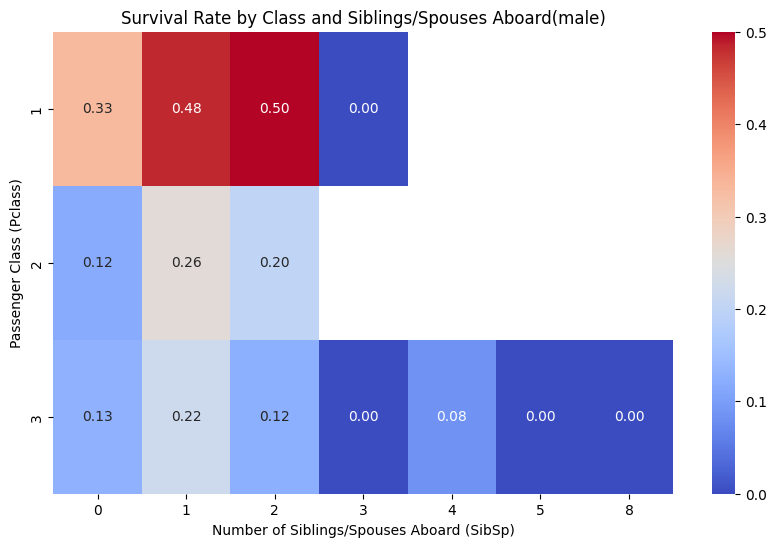

In [24]:
class_sibsp_survival_m = data_m.groupby(['Pclass', 'SibSp'])['Survived'].mean().unstack()

getHeatMap(class_sibsp_survival_m, "Survival Rate by Class and Siblings/Spouses Aboard(male)", "Number of Siblings/Spouses Aboard (SibSp)", "Passenger Class (Pclass)", "coolwarm")


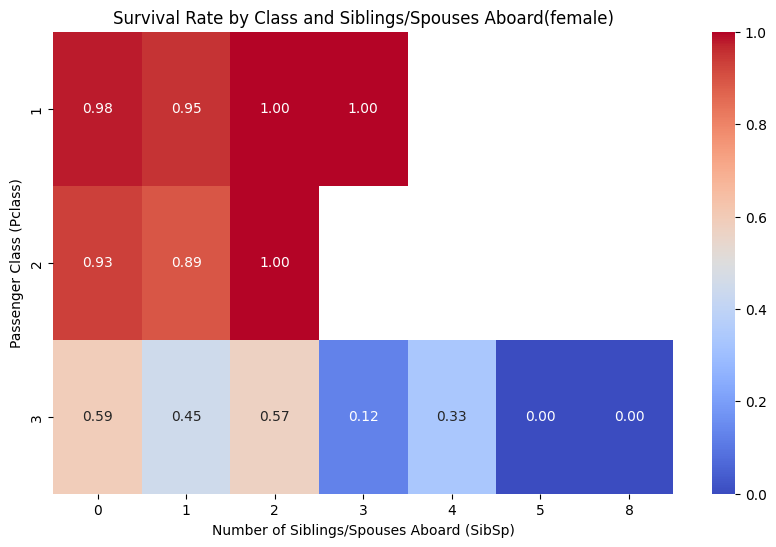

In [25]:
class_sibsp_survival_f = data_f.groupby(['Pclass', 'SibSp'])['Survived'].mean().unstack()

getHeatMap(class_sibsp_survival_f, "Survival Rate by Class and Siblings/Spouses Aboard(female)", "Number of Siblings/Spouses Aboard (SibSp)", "Passenger Class (Pclass)", "coolwarm")

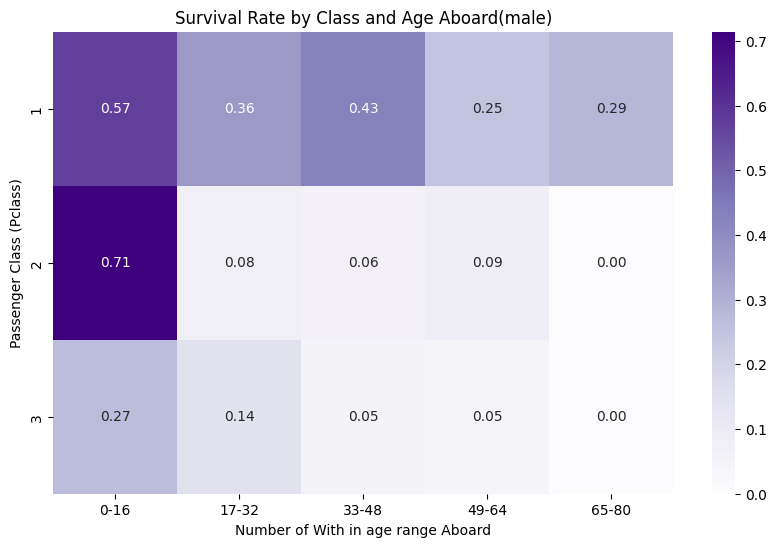

In [26]:
class_age_survival_m = data_m.groupby(['Pclass', 'Age_Range'], observed=True)['Survived'].mean().unstack()

getHeatMap(class_age_survival_m, "Survival Rate by Class and Age Aboard(male)", "Number of With in age range Aboard", "Passenger Class (Pclass)", "Purples")

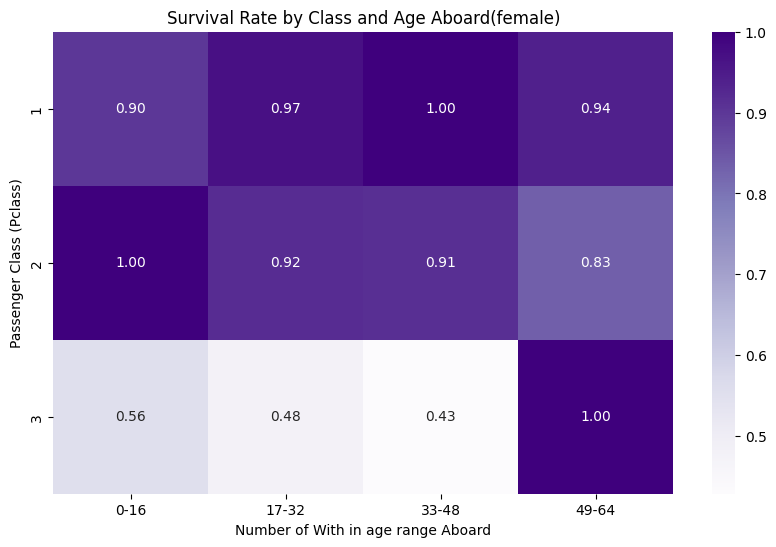

In [27]:
class_age_survival_f = data_f.groupby(['Pclass', 'Age_Range'], observed=True)['Survived'].mean().unstack()

getHeatMap(class_age_survival_f, "Survival Rate by Class and Age Aboard(female)", "Number of With in age range Aboard", "Passenger Class (Pclass)", "Purples")

There was one woman in third class who was 49-64. And she survived.  

* https://www.encyclopedia-titanica.org/titanic-survivor/hedwig-turkula.html

In [ ]:
gender_survival = filled_df.groupby('Sex')['Survived'].mean()
print(gender_survival)

class_survival = filled_df.groupby('Pclass')['Survived'].mean()
print(class_survival)

age_survival = filled_df.groupby('Age_Range')['Survived'].mean()
print(age_survival)

SibSp_survival = filled_df.groupby('SibSp')['Survived'].mean()
print(SibSp_survival)

Parch_survival = filled_df.groupby('Parch')['Survived'].mean()
print(Parch_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Age_Range
0-16     0.519380
17-32    0.343602
33-48    0.387500
49-64    0.390805
65-80    0.230769
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


<ipython-input-118-6a2d06cb807e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = filled_df.groupby('Age_Range')['Survived'].mean()
